In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/04_Apr.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,61.000000,1,7,0,2361.0,2250.0,2309.0,2382.0,2337.0,2266.0,2368.583333,2475.0
1,24.916667,61.583333,1,7,0,2394.0,2251.0,2273.0,2298.0,2242.0,2203.0,2380.666667,2418.0
2,24.833333,62.166667,1,7,0,2640.0,2355.0,2247.0,2239.0,2040.0,2055.0,2379.083333,2228.0
3,24.750000,62.750000,1,7,0,2560.0,2347.0,2270.0,2254.0,2093.0,2039.0,2373.833333,2207.0
4,24.666667,63.333333,2,7,0,2475.0,2361.0,2250.0,2209.0,2076.0,2025.0,2367.583333,2175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,27.982450,33.440678,23,4,1,2893.0,2902.0,2927.0,2931.0,3129.0,2893.0,2902.750000,2907.0
8732,27.982450,33.440678,24,4,1,2893.0,2906.0,2900.0,2896.0,3118.0,2715.0,2904.416667,2920.0
8733,27.982450,33.440678,24,4,1,2918.0,2895.0,2913.0,2868.0,3081.0,2765.0,2904.916667,2919.0
8734,27.312450,33.440678,24,4,1,2917.0,2877.0,2912.0,2898.0,3041.0,2768.0,2898.250000,2832.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   int64  
 3   B       8736 non-null   int64  
 4   C       8736 non-null   int64  
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 887.4 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8736 entries, 0 to 8735
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8736 non-null   float64
 1   Hum     8736 non-null   float64
 2   A       8736 non-null   float64
 3   B       8736 non-null   float64
 4   C       8736 non-null   float64
 5   D       8736 non-null   float64
 6   E       8736 non-null   float64
 7   F       8736 non-null   float64
 8   G       8736 non-null   float64
 9   H       8736 non-null   float64
 10  I       8736 non-null   float64
 11  J       8736 non-null   float64
 12  Cons    8736 non-null   float64
dtypes: float64(13)
memory usage: 887.4 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7200][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,-0.457939,-0.639773,-0.452618
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,-0.761527,-0.845537,-0.413125
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,-1.407052,-1.328919,-0.418300
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,-1.237682,-1.381177,-0.435459
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,-1.292008,-1.426902,-0.455886


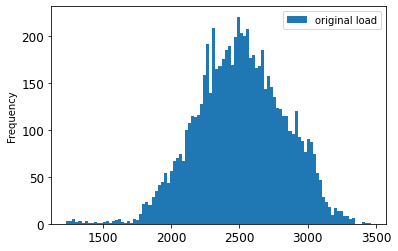

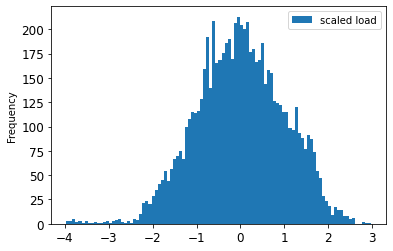

In [9]:
stlf_data[stlf_data.index <= 7200][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7200][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

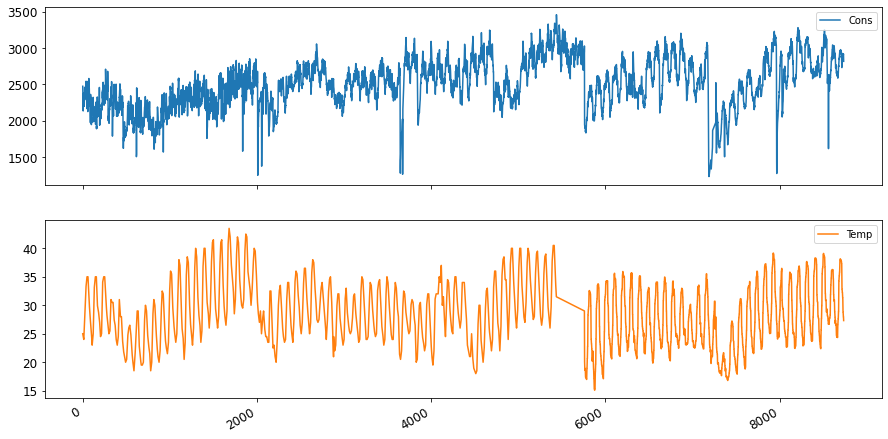

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,-0.457939,-0.639773,-0.452618,-1.408596
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,-0.761527,-0.845537,-0.413125,-1.470933
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,-1.407052,-1.328919,-0.418300,-1.595606
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,-1.237682,-1.381177,-0.435459,-1.654826
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,-1.292008,-1.426902,-0.455886,-1.617424
5,-1.156132,-0.827048,1.269294,-1.516446,1.511106,-1.457887,-0.278477,-0.355287,-0.807618,-0.936612,-1.311182,-1.547748,-0.487208,-1.371194
6,-0.872499,-0.843076,1.305507,-1.516446,1.511106,-1.457887,-0.872887,0.417276,-0.479824,-0.885912,-1.151399,-1.309323,-0.522070,-1.037692
7,-0.856915,-0.859104,1.341721,-1.516446,1.511106,-1.457887,-0.938585,0.166036,-0.505039,-0.996819,-1.071507,-1.394241,-0.553392,-0.903668
8,-0.984705,-0.875133,1.377934,-1.372000,1.511106,-1.457887,-1.038696,-0.100907,-0.460913,-1.069700,-1.208921,-1.534683,-0.599694,-0.775877
9,-0.891200,-0.891161,1.414147,-1.372000,1.511106,-1.457887,-1.160707,-0.279915,-0.356901,-0.717967,-1.253660,-1.332185,-0.646813,-0.941070


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-0.099523,-0.746906,1.088228,-1.660891,1.511106,-1.457887,-0.456800,-0.807520,-0.624810,-0.353560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099523
1,-0.277183,-0.762935,1.124441,-1.660891,1.511106,-1.457887,-0.353561,-0.804379,-0.738277,-0.619736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099523,-0.277183
2,-0.869382,-0.778963,1.160654,-1.660891,1.511106,-1.457887,0.416043,-0.477767,-0.820225,-0.806693,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099523,-0.277183,-0.869382
3,-0.934836,-0.794991,1.196868,-1.660891,1.511106,-1.457887,0.165766,-0.502891,-0.747733,-0.759161,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.099523,-0.277183,-0.869382,-0.934836
4,-1.034575,-0.811019,1.233081,-1.516446,1.511106,-1.457887,-0.100154,-0.458924,-0.810770,-0.901756,...,NaN,NaN,NaN,NaN,NaN,-0.099523,-0.277183,-0.869382,-0.934836,-1.034575
5,-1.156132,-0.827048,1.269294,-1.516446,1.511106,-1.457887,-0.278477,-0.355287,-0.807618,-0.936612,...,NaN,NaN,NaN,NaN,-0.099523,-0.277183,-0.869382,-0.934836,-1.034575,-1.156132
6,-0.872499,-0.843076,1.305507,-1.516446,1.511106,-1.457887,-0.872887,0.417276,-0.479824,-0.885912,...,NaN,NaN,NaN,-0.099523,-0.277183,-0.869382,-0.934836,-1.034575,-1.156132,-0.872499
7,-0.856915,-0.859104,1.341721,-1.516446,1.511106,-1.457887,-0.938585,0.166036,-0.505039,-0.996819,...,NaN,NaN,-0.099523,-0.277183,-0.869382,-0.934836,-1.034575,-1.156132,-0.872499,-0.856915
8,-0.984705,-0.875133,1.377934,-1.372000,1.511106,-1.457887,-1.038696,-0.100907,-0.460913,-1.069700,...,NaN,-0.099523,-0.277183,-0.869382,-0.934836,-1.034575,-1.156132,-0.872499,-0.856915,-0.984705
9,-0.891200,-0.891161,1.414147,-1.372000,1.511106,-1.457887,-1.160707,-0.279915,-0.356901,-0.717967,...,-0.099523,-0.277183,-0.869382,-0.934836,-1.034575,-1.156132,-0.872499,-0.856915,-0.984705,-0.891200


In [13]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7191,-3.927003,-0.763746,0.826318,1.372462,-0.931315,0.685924,-3.647216,-1.944382,0.040234,0.565382,...,-1.106262,-1.929108,-3.132209,-3.299272,-3.466334,-3.633397,-3.800460,-3.967522,-3.577917,-3.927003
7192,-3.893702,-0.763746,0.826318,1.516907,-0.931315,0.685924,-3.814902,-3.156616,-0.016500,0.451306,...,-1.929108,-3.132209,-3.299272,-3.466334,-3.633397,-3.800460,-3.967522,-3.577917,-3.927003,-3.893702
7193,-3.860401,-0.763746,0.826318,1.516907,-0.931315,0.685924,-3.982589,-3.324947,-0.419938,0.780858,...,-3.132209,-3.299272,-3.466334,-3.633397,-3.800460,-3.967522,-3.577917,-3.927003,-3.893702,-3.860401
7194,-3.827100,-0.947430,1.133664,1.516907,-0.931315,0.685924,-3.591530,-3.493278,-1.119653,0.910777,...,-3.299272,-3.466334,-3.633397,-3.800460,-3.967522,-3.577917,-3.927003,-3.893702,-3.860401,-3.827100
7195,-3.793799,-1.131114,1.441011,1.516907,-0.931315,0.685924,-3.941918,-3.661609,-1.951745,0.910777,...,-3.466334,-3.633397,-3.800460,-3.967522,-3.577917,-3.927003,-3.893702,-3.860401,-3.827100,-3.793799
7196,-3.760498,-1.131114,1.441011,1.661353,-0.931315,0.685924,-3.908493,-3.829940,-3.168365,0.765014,...,-3.633397,-3.800460,-3.967522,-3.577917,-3.927003,-3.893702,-3.860401,-3.827100,-3.793799,-3.760498
7197,-3.727197,-1.131114,1.441011,1.661353,-0.931315,0.685924,-3.875068,-3.998271,-3.337305,0.720651,...,-3.800460,-3.967522,-3.577917,-3.927003,-3.893702,-3.860401,-3.827100,-3.793799,-3.760498,-3.727197
7198,-3.693896,-1.204203,1.441011,1.661353,-0.931315,0.685924,-3.841643,-3.605708,-3.506245,0.590732,...,-3.967522,-3.577917,-3.927003,-3.893702,-3.860401,-3.827100,-3.793799,-3.760498,-3.727197,-3.693896
7199,-3.660595,-1.204203,1.521356,1.661353,-0.931315,0.685924,-3.808217,-3.957445,-3.675185,0.511513,...,-3.577917,-3.927003,-3.893702,-3.860401,-3.827100,-3.793799,-3.760498,-3.727197,-3.693896,-3.660595
7200,-3.627294,-1.204203,1.521356,-1.660891,-0.442831,0.685924,-3.774792,-3.923891,-3.844125,0.362581,...,-3.927003,-3.893702,-3.860401,-3.827100,-3.793799,-3.760498,-3.727197,-3.693896,-3.660595,-3.627294


In [14]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [15]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7091,0.586182,-0.373296,1.245575,1.228016,-1.419799,-1.457887,0.710120,0.074962,0.062297,1.012178,...,-0.217963,0.075020,0.274498,0.492677,0.689038,0.707739,0.642286,0.598650,0.626701,0.586182
7092,0.570598,-0.373296,1.245575,1.372462,-1.419799,-1.457887,0.644422,0.275954,-0.107904,0.926621,...,0.075020,0.274498,0.492677,0.689038,0.707739,0.642286,0.598650,0.626701,0.586182,0.570598
7093,0.592416,-0.373296,1.245575,1.372462,-1.419799,-1.457887,0.600623,0.495789,-0.256041,0.844233,...,0.274498,0.492677,0.689038,0.707739,0.642286,0.598650,0.626701,0.586182,0.570598,0.592416
7094,0.514495,-0.607950,1.463681,1.372462,-1.419799,-1.457887,0.628780,0.693641,-0.221371,0.799870,...,0.492677,0.689038,0.707739,0.642286,0.598650,0.626701,0.586182,0.570598,0.592416,0.514495
7095,0.514495,-0.842605,1.681786,1.372462,-1.419799,-1.457887,0.588109,0.712484,0.074904,0.768183,...,0.689038,0.707739,0.642286,0.598650,0.626701,0.586182,0.570598,0.592416,0.514495,0.514495
7096,0.402289,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.572467,0.646533,0.276624,0.799870,...,0.707739,0.642286,0.598650,0.626701,0.586182,0.570598,0.592416,0.514495,0.514495,0.402289
7097,0.726440,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.594366,0.602566,0.497254,0.809377,...,0.642286,0.598650,0.626701,0.586182,0.570598,0.592416,0.514495,0.514495,0.402289,0.726440
7098,0.854231,-0.806060,1.608640,1.516907,-1.419799,-1.457887,0.516155,0.630831,0.695822,0.879090,...,0.598650,0.626701,0.586182,0.570598,0.592416,0.514495,0.514495,0.402289,0.726440,0.854231
7099,0.854231,-0.769516,1.535494,1.516907,-1.419799,-1.457887,0.516155,0.590004,0.714733,0.932958,...,0.626701,0.586182,0.570598,0.592416,0.514495,0.514495,0.402289,0.726440,0.854231,0.854231
7100,0.710856,-0.769516,1.535494,1.661353,-1.419799,-1.457887,0.403530,0.574302,0.648544,0.989996,...,0.586182,0.570598,0.592416,0.514495,0.514495,0.402289,0.726440,0.854231,0.854231,0.710856


In [16]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.171716
11,-1.215352
12,-1.199767
13,-1.224702
14,-1.149898
...,...
7096,-3.760498
7097,-3.727197
7098,-3.693896
7099,-3.660595


In [17]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
10,-0.401856,-0.907189,1.450361,-1.372000,1.511106,-1.457887,-0.876016,-0.876611,0.418458,-0.556361,-0.716788,-0.852069,-0.718172
11,-0.448609,-0.923218,1.486574,-1.372000,1.511106,-1.457887,-0.860373,-0.942561,0.166309,-0.591217,-0.681636,-0.907593,-0.771828
12,-0.489128,-0.939246,1.522787,-1.227555,1.511106,-1.457887,-0.988641,-1.043058,-0.101600,-0.540517,-0.723179,-0.950052,-0.805873
13,-0.573282,-0.875133,1.434841,-1.227555,1.511106,-1.457887,-0.894786,-1.165537,-0.281256,-0.673605,-0.831832,-1.051301,-0.831748
14,-0.760293,-0.811019,1.346894,-1.227555,1.511106,-1.457887,-0.403616,-0.879751,-0.880111,-0.752824,-0.975637,-1.100293,-0.822215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7096,0.402289,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.572467,0.646533,0.276624,0.799870,1.079177,1.205570,0.605787
7097,0.726440,-0.842605,1.681786,1.516907,-1.419799,-1.457887,0.594366,0.602566,0.497254,0.809377,1.117525,1.414600,0.626215
7098,0.854231,-0.806060,1.608640,1.516907,-1.419799,-1.457887,0.516155,0.630831,0.695822,0.879090,1.331635,1.492986,0.640650
7099,0.854231,-0.769516,1.535494,1.516907,-1.419799,-1.457887,0.516155,0.590004,0.714733,0.932958,1.443484,1.342746,0.653451


In [18]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7091, 13, 1)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,1353.842105,22.622452,67.976944,1.0,3.0,1.0,1311.105263,1268.368421,1234.000000,2595.0,2652.0,2724.0,1305.302632
7202,1364.526316,22.207452,70.381340,1.0,3.0,1.0,1321.789474,1279.052632,1359.000000,2569.0,2649.0,2729.0,1305.763158
7203,1375.210526,21.792452,72.785736,1.0,3.0,1.0,1332.473684,1289.736842,1247.000000,2551.0,2638.0,2657.0,1316.447368
7204,1385.894737,21.792452,72.785736,2.0,3.0,1.0,1343.157895,1300.421053,1257.684211,2541.0,2621.0,2710.0,1327.131579
7205,1396.578947,21.792452,72.785736,2.0,3.0,1.0,1353.842105,1311.105263,1268.368421,2520.0,2609.0,2676.0,1337.815789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8157,2616.000000,24.962452,56.902264,24.0,5.0,1.0,2815.000000,2926.000000,3041.000000,2696.0,1603.0,2874.0,2846.250000
8158,2538.000000,25.262451,56.902264,24.0,5.0,1.0,2826.000000,2874.000000,3029.000000,2684.0,1439.5,2857.0,2805.333333
8159,2596.000000,25.262451,54.062824,24.0,5.0,1.0,2776.000000,2827.000000,2994.000000,2530.0,1276.0,2818.0,2772.166667
8160,2580.000000,25.262451,54.062824,1.0,6.0,1.0,2728.000000,2782.000000,2962.000000,2609.0,1408.0,2797.0,2740.333333


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,0.697907,0.995798,-2.620022
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,0.690763,1.008757,-2.618899
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,0.664569,0.822139,-2.592850
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,0.624088,0.959511,-2.566800
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,0.595513,0.871385,-2.540750
7206,-2.353742,-0.751512,0.555742,-1.513750,-0.579955,0.654167,-2.412752,-2.469157,-2.525335,0.407439,0.576463,0.972470,-2.514700
7207,-2.328087,-0.718584,0.471723,-1.513750,-0.579955,0.654167,-2.387425,-2.444140,-2.500600,0.412096,0.497881,0.889529,-2.488650
7208,-2.302432,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.362098,-2.419123,-2.475864,0.393469,0.426444,0.853242,-2.462600
7209,-2.276776,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.336771,-2.394106,-2.451129,0.337590,0.388344,0.770300,-2.436550
7210,-2.251121,-0.925682,0.949708,-1.369419,-0.579955,0.654167,-2.311444,-2.369088,-2.426394,0.202548,0.312144,0.684767,-2.410500


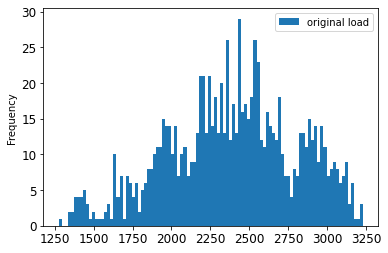

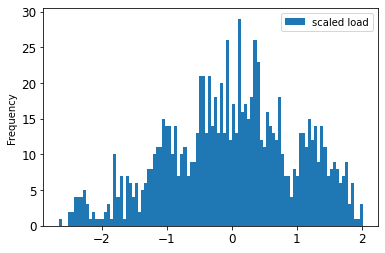

In [21]:
stlf_data[(stlf_data.index >=7201) & (stlf_data.index <=8161)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7201) & (valid.index <=8161)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,0.697907,0.995798,-2.620022,-1.749264
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,0.690763,1.008757,-2.618899,-1.730054
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,0.664569,0.822139,-2.592850,-1.734857
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,0.624088,0.959511,-2.566800,-1.761270
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,0.595513,0.871385,-2.540750,-1.778079
7206,-2.353742,-0.751512,0.555742,-1.513750,-0.579955,0.654167,-2.412752,-2.469157,-2.525335,0.407439,0.576463,0.972470,-2.514700,-1.794887
7207,-2.328087,-0.718584,0.471723,-1.513750,-0.579955,0.654167,-2.387425,-2.444140,-2.500600,0.412096,0.497881,0.889529,-2.488650,-1.802091
7208,-2.302432,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.362098,-2.419123,-2.475864,0.393469,0.426444,0.853242,-2.462600,-1.823702
7209,-2.276776,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.336771,-2.394106,-2.451129,0.337590,0.388344,0.770300,-2.436550,-1.821301
7210,-2.251121,-0.925682,0.949708,-1.369419,-0.579955,0.654167,-2.311444,-2.369088,-2.426394,0.202548,0.312144,0.684767,-2.410500,-1.799690


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7201,-2.482018,-0.640597,0.396494,-1.658081,-0.579955,0.654167,-2.539387,-2.594244,-2.629637,0.561108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.482018
7202,-2.456363,-0.712518,0.518127,-1.658081,-0.579955,0.654167,-2.514060,-2.569226,-2.340246,0.500572,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.482018,-2.456363
7203,-2.430708,-0.784439,0.639760,-1.658081,-0.579955,0.654167,-2.488733,-2.544209,-2.599541,0.458662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.482018,-2.456363,-2.430708
7204,-2.405053,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.463406,-2.519192,-2.574805,0.435379,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.482018,-2.456363,-2.430708,-2.405053
7205,-2.379397,-0.784439,0.639760,-1.513750,-0.579955,0.654167,-2.438079,-2.494175,-2.550070,0.386484,...,NaN,NaN,NaN,NaN,NaN,-2.482018,-2.456363,-2.430708,-2.405053,-2.379397
7206,-2.353742,-0.751512,0.555742,-1.513750,-0.579955,0.654167,-2.412752,-2.469157,-2.525335,0.407439,...,NaN,NaN,NaN,NaN,-2.482018,-2.456363,-2.430708,-2.405053,-2.379397,-2.353742
7207,-2.328087,-0.718584,0.471723,-1.513750,-0.579955,0.654167,-2.387425,-2.444140,-2.500600,0.412096,...,NaN,NaN,NaN,-2.482018,-2.456363,-2.430708,-2.405053,-2.379397,-2.353742,-2.328087
7208,-2.302432,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.362098,-2.419123,-2.475864,0.393469,...,NaN,NaN,-2.482018,-2.456363,-2.430708,-2.405053,-2.379397,-2.353742,-2.328087,-2.302432
7209,-2.276776,-0.718584,0.471723,-1.369419,-0.579955,0.654167,-2.336771,-2.394106,-2.451129,0.337590,...,NaN,-2.482018,-2.456363,-2.430708,-2.405053,-2.379397,-2.353742,-2.328087,-2.302432,-2.276776
7210,-2.251121,-0.925682,0.949708,-1.369419,-0.579955,0.654167,-2.311444,-2.369088,-2.426394,0.202548,...,-2.482018,-2.456363,-2.430708,-2.405053,-2.379397,-2.353742,-2.328087,-2.302432,-2.276776,-2.251121


In [24]:
valid_shifted = valid_shifted.dropna(how='any')

In [25]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8052,0.707194,0.168732,-1.053888,1.372873,-0.003002,0.654167,0.724557,0.554233,-0.231165,1.776487,...,0.423849,0.541509,0.639960,0.776830,0.699990,0.721602,0.627954,0.699990,0.724003,0.707194
8053,0.736009,0.168732,-1.053888,1.372873,-0.003002,0.654167,0.632107,0.650235,-0.018173,1.760189,...,0.541509,0.639960,0.776830,0.699990,0.721602,0.627954,0.699990,0.724003,0.707194,0.736009
8054,0.760021,0.039620,-0.858497,1.372873,-0.003002,0.654167,0.703222,0.783702,0.287424,1.727593,...,0.639960,0.776830,0.699990,0.721602,0.627954,0.699990,0.724003,0.707194,0.736009,0.760021
8055,0.690386,-0.089491,-0.663106,1.372873,-0.003002,0.654167,0.726927,0.708773,0.449483,1.667057,...,0.776830,0.699990,0.721602,0.627954,0.699990,0.724003,0.707194,0.736009,0.760021,0.690386
8056,0.752818,-0.089491,-0.663106,1.517204,-0.003002,0.654167,0.710334,0.729847,0.562924,1.622819,...,0.699990,0.721602,0.627954,0.699990,0.724003,0.707194,0.736009,0.760021,0.690386,0.752818
8057,0.851268,-0.089491,-0.663106,1.517204,-0.003002,0.654167,0.738780,0.638528,0.657845,1.634460,...,0.721602,0.627954,0.699990,0.724003,0.707194,0.736009,0.760021,0.690386,0.752818,0.851268
8058,0.848867,-0.121553,-0.629546,1.517204,-0.003002,0.654167,0.762485,0.708773,0.789807,1.590222,...,0.627954,0.699990,0.724003,0.707194,0.736009,0.760021,0.690386,0.752818,0.851268,0.848867
8059,0.870478,-0.153614,-0.595987,1.517204,-0.003002,0.654167,0.693740,0.732189,0.715723,1.145514,...,0.699990,0.724003,0.707194,0.736009,0.760021,0.690386,0.752818,0.851268,0.848867,0.870478
8060,0.808046,-0.153614,-0.595987,1.661535,-0.003002,0.654167,0.755374,0.715798,0.736559,0.456334,...,0.724003,0.707194,0.736009,0.760021,0.690386,0.752818,0.851268,0.848867,0.870478,0.808046
8061,0.740811,-0.153614,-0.595987,1.661535,-0.003002,0.654167,0.852564,0.743896,0.646269,-1.748579,...,0.707194,0.736009,0.760021,0.690386,0.752818,0.851268,0.848867,0.870478,0.808046,0.740811


In [26]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7211,-1.787684
7212,-1.806894
7213,-1.744462
7214,-1.725252
7215,-1.650814
...,...
8057,0.548713
8058,0.361417
8059,0.500688
8060,0.462269


In [27]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7211,-2.219905,-1.132780,1.427693,-1.369419,-0.579955,0.654167,-2.286117,-2.344071,-2.401658,0.202548,0.278806,0.586274,-2.383979
7212,-2.239115,-1.132780,1.427693,-1.225087,-0.579955,0.654167,-2.260790,-2.319054,-2.376923,0.223502,0.169268,0.591458,-2.361255
7213,-2.332763,-1.132780,1.427693,-1.225087,-0.579955,0.654167,-2.235463,-2.294037,-2.352188,0.211861,0.088306,0.601825,-2.348626
7214,-2.426411,-1.066925,1.347978,-1.225087,-0.579955,0.654167,-2.210136,-2.269019,-2.327452,0.260755,0.162125,0.635520,-2.346092
7215,-2.520059,-1.001069,1.268264,-1.225087,-0.579955,0.654167,-2.179319,-2.244002,-2.302717,0.242129,0.033537,0.565538,-2.353652
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8057,0.851268,-0.089491,-0.663106,1.517204,-0.003002,0.654167,0.738780,0.638528,0.657845,1.634460,1.162251,0.487781,0.758748
8058,0.848867,-0.121553,-0.629546,1.517204,-0.003002,0.654167,0.762485,0.708773,0.789807,1.590222,1.343226,0.664031,0.764844
8059,0.870478,-0.153614,-0.595987,1.517204,-0.003002,0.654167,0.693740,0.732189,0.715723,1.145514,1.383708,0.669215,0.779270
8060,0.808046,-0.153614,-0.595987,1.661535,-0.003002,0.654167,0.755374,0.715798,0.736559,0.456334,1.357514,0.731421,0.786584


In [28]:
X_valid=np.atleast_3d(X_valid)

print(X_valid.shape)

(851, 13, 1)


In [29]:
#from keras.layers import RepeatVector
batch_size = 300

model = models.Sequential()

model.add(LSTM(64, input_shape=(1,1)))
model.add(Dropout(0.2))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
29/29 [==============================] - 1s 45ms/step - loss: 0.9990 - val_loss: 0.8071
Epoch 2/300
29/29 [==============================] - 1s 23ms/step - loss: 0.9871 - val_loss: 0.8003
Epoch 3/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9741 - val_loss: 0.7936
Epoch 4/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9640 - val_loss: 0.7872
Epoch 5/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9521 - val_loss: 0.7807
Epoch 6/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9421 - val_loss: 0.7743
Epoch 7/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9316 - val_loss: 0.7683
Epoch 8/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9240 - val_loss: 0.7623
Epoch 9/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9136 - val_loss: 0.7564
Epoch 10/300
29/29 [==============================] - 1s 22ms/step - loss: 0.9019 - val_loss: 0.7507

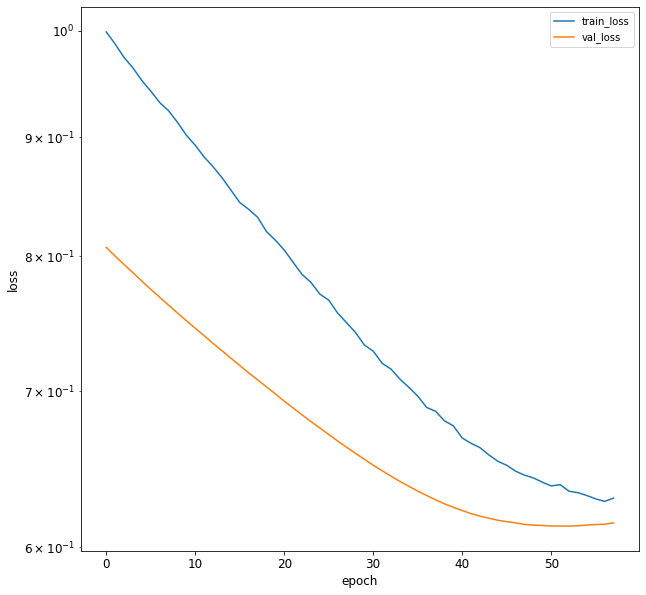

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index<= 8373)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8162,2534.0,25.112452,55.120832,1.0,6.0,1.0,2538.0,2826.0,2874.0,2559.0,1603.0,2760.0,2679.416667
8163,2529.0,24.962452,56.178840,1.0,6.0,1.0,2596.0,2776.0,2827.0,2558.0,1723.0,2747.0,2654.583333
8164,2524.0,24.962452,56.178840,2.0,6.0,1.0,2580.0,2728.0,2782.0,2528.0,1809.0,2729.0,2633.083333
8165,2538.0,24.962452,56.178840,2.0,6.0,1.0,2535.0,2616.0,2815.0,2519.0,1862.0,2721.0,2610.000000
8166,2535.0,24.657452,57.297104,2.0,6.0,1.0,2534.0,2538.0,2826.0,2532.0,1938.0,2706.0,2585.750000
8167,2546.0,24.352451,58.415367,2.0,6.0,1.0,2529.0,2596.0,2776.0,2525.0,1970.0,2680.0,2566.583333
8168,2530.0,24.352451,58.415367,3.0,6.0,1.0,2524.0,2580.0,2728.0,2515.0,1973.0,2687.0,2550.083333
8169,2508.0,24.352451,58.415367,3.0,6.0,1.0,2538.0,2535.0,2616.0,2498.0,1987.0,2632.0,2541.083333
8170,2511.0,23.417451,62.178333,3.0,6.0,1.0,2535.0,2534.0,2538.0,2471.0,2003.0,2637.0,2538.833333
8171,2500.0,22.482450,65.941300,3.0,6.0,1.0,2546.0,2529.0,2596.0,2459.0,2009.0,2626.0,2530.833333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8162 to 8373
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


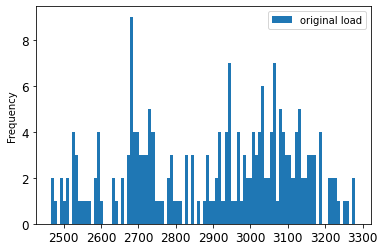

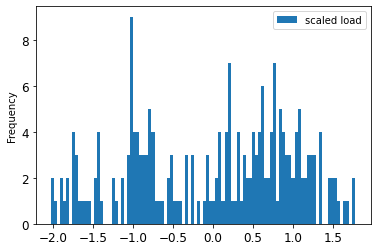

In [36]:
stlf_data[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8162) & (test.index <= 8373)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8162,-1.705257,-0.814252,0.787168,-1.498364,0.037858,1.12041,-1.652399,-0.333183,-0.123017,-1.179917,-3.272249,0.291871,-1.059521,-0.389998
8163,-1.728578,-0.843013,0.861006,-1.498364,0.037858,1.12041,-1.385634,-0.563775,-0.341199,-1.184135,-2.886408,0.258804,-1.179687,-0.529919
8164,-1.751898,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.459225,-0.785143,-0.550096,-1.310698,-2.609889,0.213019,-1.283723,-0.543911
8165,-1.686601,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.666198,-1.301668,-0.396905,-1.348667,-2.439475,0.192671,-1.395420,-0.669840
8166,-1.700593,-0.901493,0.939049,-1.357685,0.037858,1.12041,-1.670797,-1.661391,-0.345841,-1.293823,-2.195109,0.154517,-1.512763,-0.749129
8167,-1.649289,-0.959973,1.017092,-1.357685,0.037858,1.12041,-1.693794,-1.393904,-0.577949,-1.323354,-2.092218,0.088384,-1.605508,-0.758457
8168,-1.723914,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.716791,-1.467694,-0.800773,-1.365542,-2.082572,0.106189,-1.685350,-0.786441
8169,-1.826523,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.652399,-1.675226,-1.320695,-1.437260,-2.037557,-0.033709,-1.728900,-0.982331
8170,-1.812530,-1.139248,1.279707,-1.217006,0.037858,1.12041,-1.666198,-1.679838,-1.682784,-1.551167,-1.986112,-0.020991,-1.739787,-1.005651
8171,-1.863835,-1.318523,1.542322,-1.217006,0.037858,1.12041,-1.615604,-1.702897,-1.413538,-1.601792,-1.966820,-0.048970,-1.778498,-0.921698


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8162,-1.705257,-0.814252,0.787168,-1.498364,0.037858,1.12041,-1.652399,-0.333183,-0.123017,-1.179917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.705257
8163,-1.728578,-0.843013,0.861006,-1.498364,0.037858,1.12041,-1.385634,-0.563775,-0.341199,-1.184135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.705257,-1.728578
8164,-1.751898,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.459225,-0.785143,-0.550096,-1.310698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.705257,-1.728578,-1.751898
8165,-1.686601,-0.843013,0.861006,-1.357685,0.037858,1.12041,-1.666198,-1.301668,-0.396905,-1.348667,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.705257,-1.728578,-1.751898,-1.686601
8166,-1.700593,-0.901493,0.939049,-1.357685,0.037858,1.12041,-1.670797,-1.661391,-0.345841,-1.293823,...,NaN,NaN,NaN,NaN,NaN,-1.705257,-1.728578,-1.751898,-1.686601,-1.700593
8167,-1.649289,-0.959973,1.017092,-1.357685,0.037858,1.12041,-1.693794,-1.393904,-0.577949,-1.323354,...,NaN,NaN,NaN,NaN,-1.705257,-1.728578,-1.751898,-1.686601,-1.700593,-1.649289
8168,-1.723914,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.716791,-1.467694,-0.800773,-1.365542,...,NaN,NaN,NaN,-1.705257,-1.728578,-1.751898,-1.686601,-1.700593,-1.649289,-1.723914
8169,-1.826523,-0.959973,1.017092,-1.217006,0.037858,1.12041,-1.652399,-1.675226,-1.320695,-1.437260,...,NaN,NaN,-1.705257,-1.728578,-1.751898,-1.686601,-1.700593,-1.649289,-1.723914,-1.826523
8170,-1.812530,-1.139248,1.279707,-1.217006,0.037858,1.12041,-1.666198,-1.679838,-1.682784,-1.551167,...,NaN,-1.705257,-1.728578,-1.751898,-1.686601,-1.700593,-1.649289,-1.723914,-1.826523,-1.812530
8171,-1.863835,-1.318523,1.542322,-1.217006,0.037858,1.12041,-1.615604,-1.702897,-1.413538,-1.601792,...,-1.705257,-1.728578,-1.751898,-1.686601,-1.700593,-1.649289,-1.723914,-1.826523,-1.812530,-1.863835


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8269,-0.982331,-1.243745,1.610015,-1.076327,0.611132,-0.89253,-0.649730,-0.517656,-0.067311,-1.572260,...,-0.571895,-0.529919,-0.389998,-0.529919,-0.543911,-0.669840,-0.749129,-0.758457,-0.786441,-0.982331
8270,-1.005651,-1.231282,1.511853,-1.076327,0.611132,-0.89253,-0.727920,-0.379301,-0.336557,-1.517417,...,-0.529919,-0.389998,-0.529919,-0.543911,-0.669840,-0.749129,-0.758457,-0.786441,-0.982331,-1.005651
8271,-0.921698,-1.218819,1.413692,-1.076327,0.611132,-0.89253,-0.737119,-0.517656,-0.252998,-1.462573,...,-0.389998,-0.529919,-0.543911,-0.669840,-0.749129,-0.758457,-0.786441,-0.982331,-1.005651,-0.921698
8272,-0.996323,-1.218819,1.413692,-0.935648,0.611132,-0.89253,-0.764715,-0.531492,-0.573307,-1.462573,...,-0.529919,-0.543911,-0.669840,-0.749129,-0.758457,-0.786441,-0.982331,-1.005651,-0.921698,-0.996323
8273,-1.042963,-1.218819,1.413692,-0.935648,0.611132,-0.89253,-0.957890,-0.656011,-0.531528,-1.298042,...,-0.543911,-0.669840,-0.749129,-0.758457,-0.786441,-0.982331,-1.005651,-0.921698,-0.996323,-1.042963


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8172,-0.996323
8173,-1.042963
8174,-1.010315
8175,-0.875058
8176,-1.005651
...,...
8269,-1.005651
8270,-0.949683
8271,-0.982331
8272,-0.996323


In [41]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8172,-2.013084,-1.318523,1.542322,-1.076327,0.037858,1.12041,-1.689195,-1.725956,-1.487813,-1.610229,-1.870359,-0.023534,-1.823661
8173,-2.022412,-1.318523,1.542322,-1.076327,0.037858,1.12041,-1.790381,-1.661391,-1.696710,-1.622885,-1.806053,-0.064232,-1.851485
8174,-1.961780,-1.324275,1.490881,-1.076327,0.037858,1.12041,-1.776583,-1.675226,-1.701352,-1.656635,-1.699946,-0.036252,-1.873663
8175,-1.901147,-1.330027,1.439439,-1.076327,0.037858,1.12041,-1.827177,-1.624496,-1.724563,-1.703042,-1.632424,-0.054057,-1.888583
8176,-1.901147,-1.330027,1.439439,-0.935648,0.037858,1.12041,-1.974357,-1.698285,-1.747774,-1.660854,-1.539179,-0.066775,-1.901487
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,-0.982331,-1.243745,1.610015,-1.076327,0.611132,-0.89253,-0.649730,-0.517656,-0.067311,-1.572260,-0.535992,-1.491184,-0.607489
8270,-1.005651,-1.231282,1.511853,-1.076327,0.611132,-0.89253,-0.727920,-0.379301,-0.336557,-1.517417,-0.561715,-1.407245,-0.665556
8271,-0.921698,-1.218819,1.413692,-1.076327,0.611132,-0.89253,-0.737119,-0.517656,-0.252998,-1.462573,-0.597083,-1.353830,-0.723622
8272,-0.996323,-1.218819,1.413692,-0.935648,0.611132,-0.89253,-0.764715,-0.531492,-0.573307,-1.462573,-0.564930,-1.280066,-0.760317


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 13, 1)

In [43]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,13,1)

In [44]:
predictions = model.predict(X_test)
predictions

array([[-0.7609329 ],
       [-0.7756249 ],
       [-0.7716281 ],
       [-0.7737371 ],
       [-0.77417976],
       [-0.7626292 ],
       [-0.74442095],
       [-0.73212236],
       [-0.7239731 ],
       [-0.7066707 ],
       [-0.68794143],
       [-0.67584544],
       [-0.66524273],
       [-0.65339226],
       [-0.6226533 ],
       [-0.6164494 ],
       [-0.5915462 ],
       [-0.5676392 ],
       [-0.5562793 ],
       [-0.54972404],
       [-0.45935312],
       [-0.40927705],
       [-0.3407074 ],
       [-0.25868574],
       [-0.16658162],
       [-0.12729259],
       [-0.08561242],
       [-0.00917284],
       [ 0.06554165],
       [ 0.12325504],
       [ 0.22470495],
       [ 0.28630272],
       [ 0.31782255],
       [ 0.39935678],
       [ 0.5208623 ],
       [ 0.57967347],
       [ 0.62197673],
       [ 0.68009186],
       [ 0.7225794 ],
       [ 0.7561062 ],
       [ 0.77744657],
       [ 0.78852636],
       [ 0.82792884],
       [ 0.8490487 ],
       [ 0.8642823 ],
       [ 0

In [45]:
feature=stlf_data.copy()[(stlf_data.index >= 8162) & (stlf_data.index <=8373)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    2899.617925
dtype: float64
Cons    214.91376
dtype: float64


In [46]:
load_mean=2899.617925
load_std=214.91376
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(102, 1)


In [47]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(102, 1)


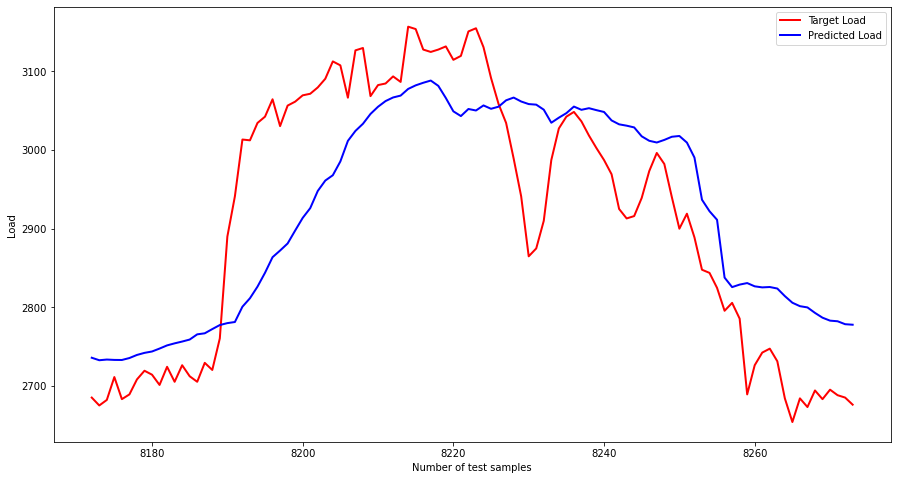

In [48]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

2.8260521367642815


In [50]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -0.404948
dtype: float64


In [51]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8172  268447.555790
8173  267444.925232
8174  268146.817206
8175  271054.790363
8176  268247.112393
...             ...
8269  268245.110787
8270  269448.553460
8271  268746.656167
8272  268445.968995
8273  267543.514989

[102 rows x 1 columns]


In [52]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

           y_t+100
8172   2559.207683
8173   3301.055208
8174   2631.395423
8175    474.155876
8176   2474.706511
...            ...
8269  10703.829388
8270   7688.541430
8271   8821.266849
8272   8686.592940
8273  10313.612788

[102 rows x 1 columns]
y_t+100    9550.226571
dtype: float64


In [53]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    97.725261
dtype: float64


In [54]:
a=np.array(rescaled_predicted_load)

In [55]:
for i in  range(0,102):
    b=a[i]
    print(b)

[2736.083]
[2732.9255]
[2733.7844]
[2733.331]
[2733.236]
[2735.7185]
[2739.6316]
[2742.2747]
[2744.0261]
[2747.7446]
[2751.7698]
[2754.3694]
[2756.6482]
[2759.1948]
[2765.8013]
[2767.1345]
[2772.4866]
[2777.6245]
[2780.066]
[2781.4746]
[2800.8967]
[2811.6587]
[2826.3953]
[2844.0227]
[2863.8171]
[2872.261]
[2881.2188]
[2897.6465]
[2913.7036]
[2926.1072]
[2947.9102]
[2961.1482]
[2967.9224]
[2985.445]
[3011.5583]
[3024.1978]
[3033.2893]
[3045.779]
[3054.9102]
[3062.1155]
[3066.702]
[3069.083]
[3077.5513]
[3082.09]
[3085.364]
[3088.196]
[3081.4534]
[3066.0256]
[3049.0737]
[3043.0615]
[3052.0657]
[3050.1475]
[3056.5845]
[3052.3162]
[3054.9888]
[3063.0803]
[3066.5662]
[3061.5784]
[3058.2993]
[3057.578]
[3051.1833]
[3034.6025]
[3041.0059]
[3046.7751]
[3055.1357]
[3051.0234]
[3053.0808]
[3050.5667]
[3048.276]
[3037.5317]
[3032.5735]
[3030.868]
[3028.6572]
[3017.3425]
[3011.6675]
[3009.4897]
[3012.7852]
[3016.7878]
[3017.7783]
[3009.4016]
[2990.39]
[2936.821]
[2922.2046]
[2911.304]
[2837.8872]
